### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

# Chapter 17: Experiments outdoor


## Import modules

In [1]:
import csv
import re
import os
import librosa

import pandas  as pd
import numpy   as np
import seaborn as sns

from sklearn     import metrics
from collections import Counter
from matplotlib  import pyplot as plt

from MT_ESR_evaluation_tflite import ESR_evaluation_tflite

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

In [2]:
# Globals
cmap_cm   = plt.cm.Blues

current_path = os.getcwd()

# For the picture names
pic_first_name = '17_Experiments_outdoor_'

# Folder for the predictive models
path_modelsVal = os.path.join(current_path, "_ESR", "Saved_models_fold_1_validation")
path_arrays    = os.path.join(current_path, "_ESR", "Arrays")

# Folder for this notebook
path_experiments  = os.path.join(current_path, "_experiments")

# Check if the folder exists, if not, create it
if not os.path.exists(path_experiments):
    os.makedirs(path_experiments)

# DRIVING ON STREETS   
path_exp_driving = os.path.join(path_experiments, "_driving_on_streets")
path_ground_truth_driving = os.path.join(path_exp_driving, "ground_truth")
path_predictions_driving  = os.path.join(path_exp_driving, "predictions")


# Check if the folder exists, if not, create it
if not os.path.exists(path_exp_driving):
    os.makedirs(path_exp_driving)
    
# Check if the folder exists, if not, create it
if not os.path.exists(path_predictions_driving):
    os.makedirs(path_predictions_driving)    
    
# Check if the folder exists, if not, create it
if not os.path.exists(path_ground_truth_driving):
    os.makedirs(path_ground_truth_driving)        


nom_classes = []
with open(os.path.join(current_path, '_ESR', 'Arrays', 'nom_classes.csv'), 'r') as file:
    for line in file:
        nom_classes.append(line.strip())

In [3]:
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [4]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [5]:
# Simple confusion matrix

def simple_conf_matrix(y_true, y_pred, esr_class, nom_classes, acc):
    
    picture_name = f'{pic_first_name}{get_next_file_number(path_experiments):02d}.png'
    
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    title = esr_class + ' - F1 score weighted average: '+ str("{:0.2f} %".format(acc*100))

    plt.figure(figsize = (10,10))
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt='g', 
                cmap=cmap_cm, 
                annot_kws={"size": 14}, 
                xticklabels=nom_classes, 
                yticklabels=nom_classes)
    plt.title(title, fontsize = 16)
    plt.savefig(os.path.join(path_experiments, picture_name))
    plt.show()

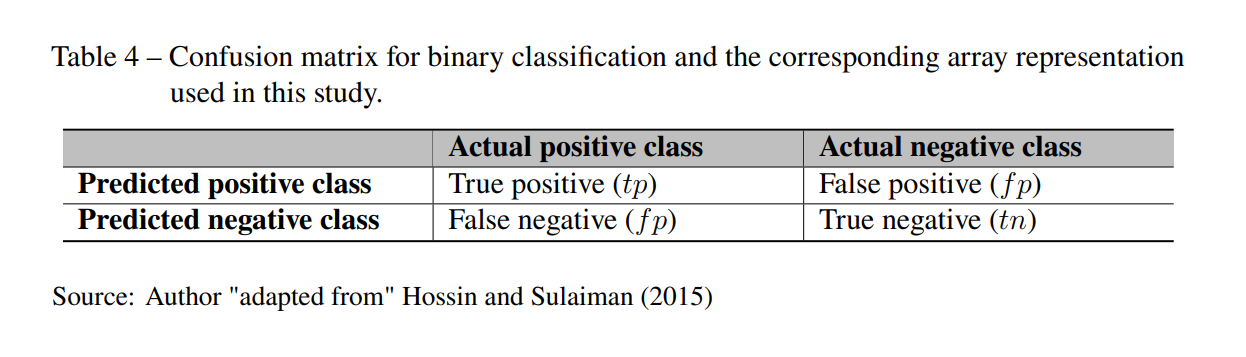

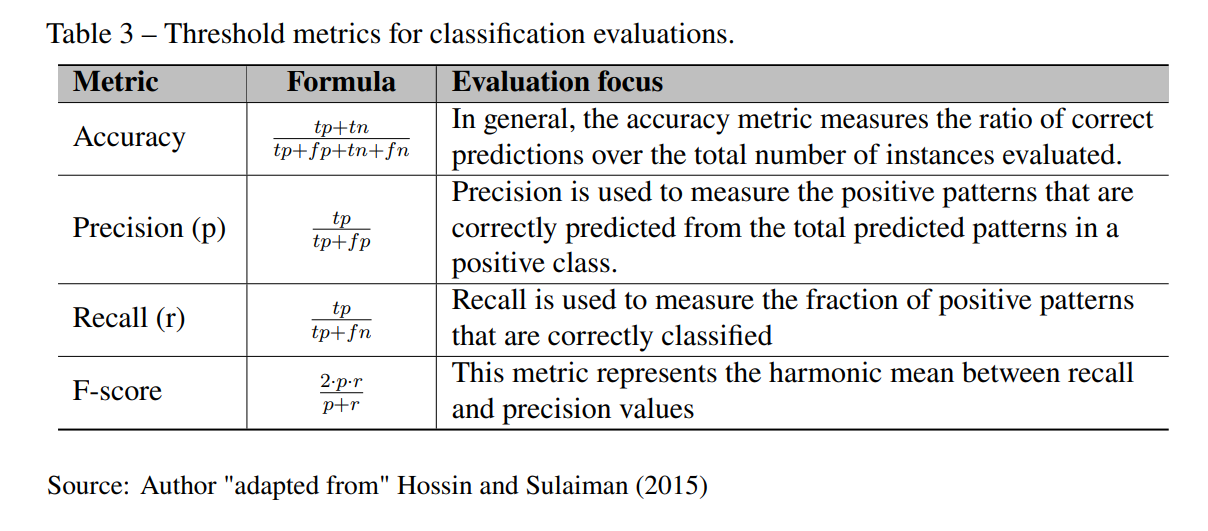

## Driving on streets 01 - Ground truth from Audacity

**Manually labeled**

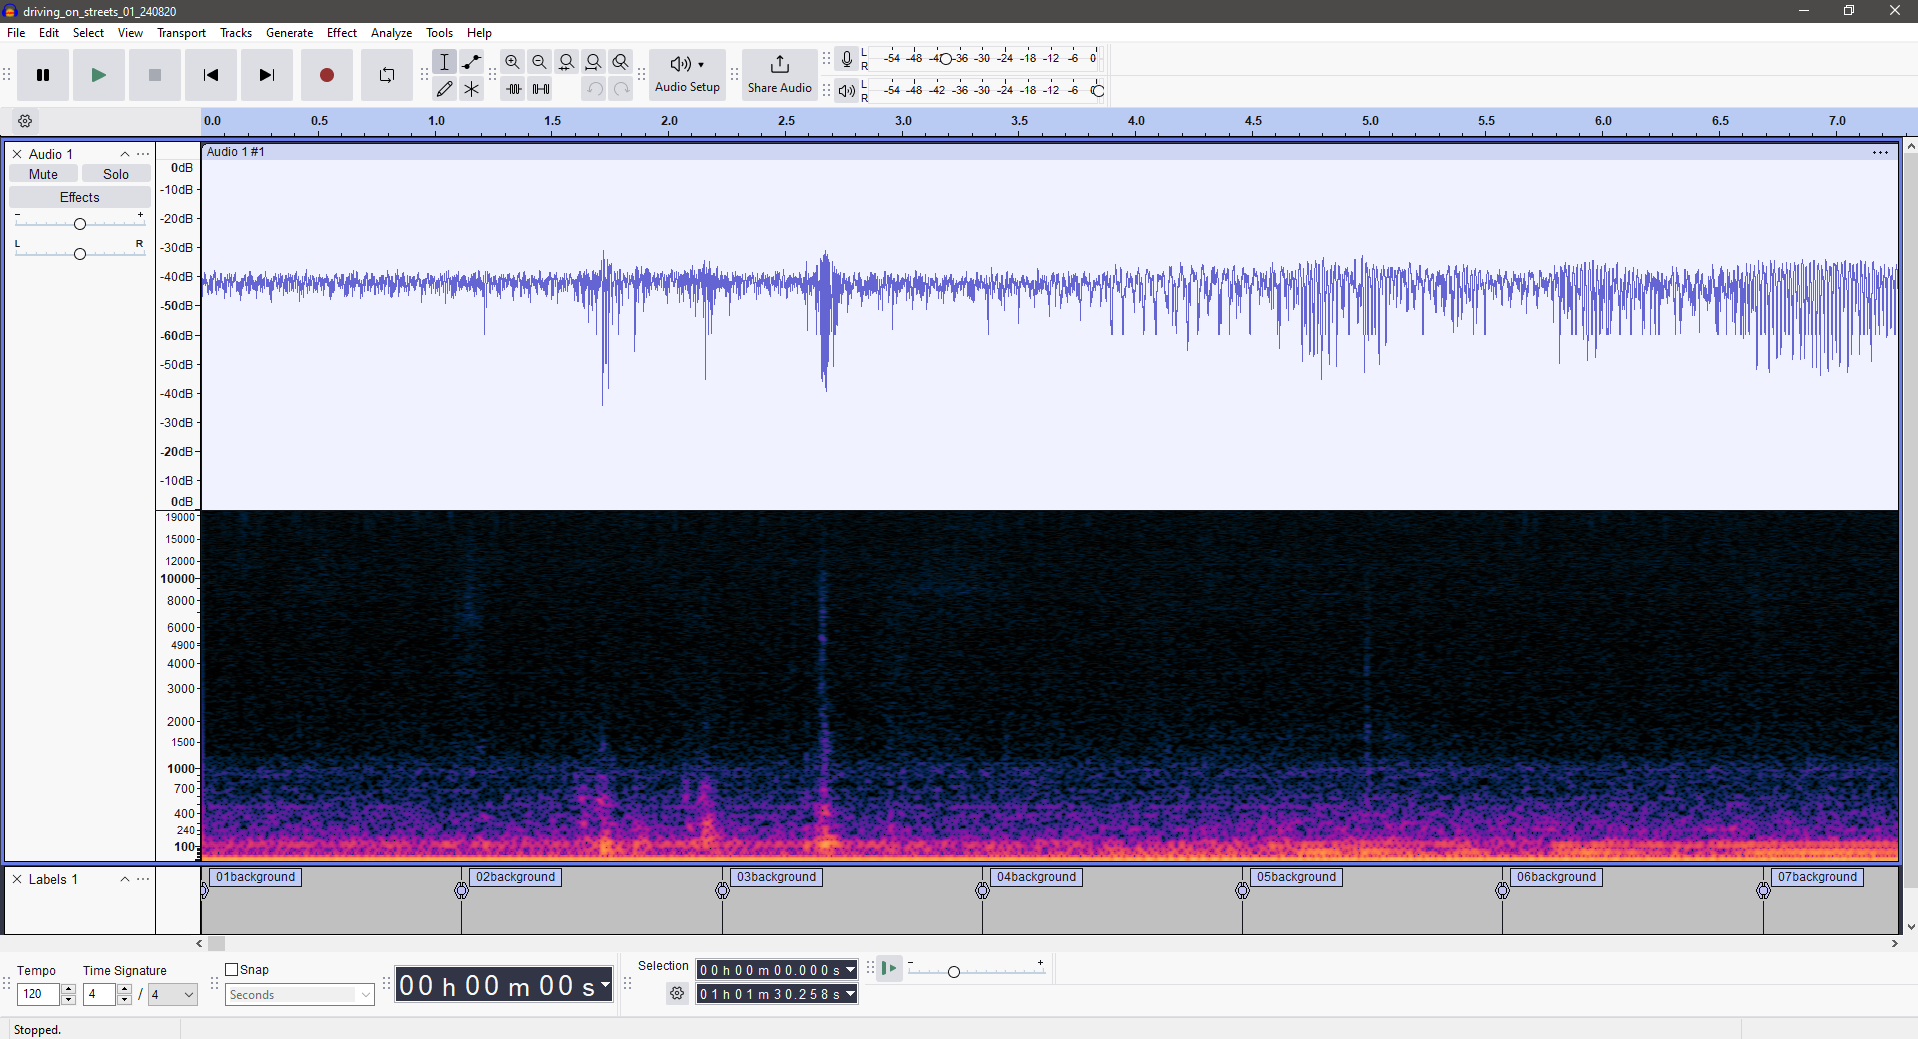

In [6]:
db_driving = pd.read_csv(os.path.join(path_ground_truth_driving, 'driving_on_streets_01_truth.txt'), sep=",")
db_driving

,start,end,ground_truth
0,0.000000,0.000000,01background
1,1.114558,1.114558,02background
2,2.229116,2.229116,03background
3,3.343673,3.343673,04background
4,4.458231,4.458231,05background
...,...,...,...
3305,3683.613605,3683.613605,3306background
3306,3684.728163,3684.728163,3307background
3307,3685.842721,3685.842721,3308background
3308,3686.957279,3686.957279,3309background


In [7]:
db_driving['ground_truth'] = db_driving['ground_truth'].apply(lambda x: re.sub(r'\d+', '', x))
db_driving

,start,end,ground_truth
0,0.000000,0.000000,background
1,1.114558,1.114558,background
2,2.229116,2.229116,background
3,3.343673,3.343673,background
4,4.458231,4.458231,background
...,...,...,...
3305,3683.613605,3683.613605,background
3306,3684.728163,3684.728163,background
3307,3685.842721,3685.842721,background
3308,3686.957279,3686.957279,background


In [8]:
db_driving_gt = db_driving['ground_truth'].tolist()
db_driving_gt

['background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'background',
 'backgrou

In [9]:
db_driving_gt[0]

'background'

In [10]:
len(db_driving_gt)

3310

## Driving on streets 01 - Predictions from the ESR algorithm

In [11]:
with open(os.path.join(path_exp_driving, '_live_audio_predictions_driving_on_streets_01.csv'), newline='') as f:
    reader       = csv.reader(f)
    data         = list(reader)
    data         = data[0]
    driving_pred = [element.strip("'") for element in data]
       
    # Normalize the number of samples predicted based on the ground truth data
    if len(driving_pred) > len(db_driving_gt):
        del driving_pred[-(len(driving_pred)-len(db_driving_gt)):]
    elif len(driving_pred) == len(db_driving_gt):
        pass
    else:
        print(f'Ground truth has more samples ({len(db_driving_gt)}) than prediction samples ({len(driving_pred)})')
        print('\nCheck the data.\n')

print(driving_pred)

['background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'background', 'dog_bark', 'dog_bark', 'dog_bark

In [12]:
len(driving_pred)

3310

In [13]:
len(db_driving_gt)

3310

## Driving on streets 01 - Classification report

In [14]:
list_unique_truth = set(db_driving_gt)
list_unique_pred  = set(driving_pred)
print(list_unique_truth)
print(list_unique_pred)

{'background'}
{'dog_bark', 'children_playing', 'car_horn', 'background'}


In [15]:
nom_classes_driving = sorted(list(list_unique_pred.union(list_unique_truth)))
 
print("The resultant merged list is ")
print(nom_classes_driving)

The resultant merged list is 
['background', 'car_horn', 'children_playing', 'dog_bark']


In [16]:
driving1 = Counter(db_driving_gt)
driving1

Counter({'background': 3310})

In [17]:
driving2 = Counter(driving_pred)
driving2

Counter({'background': 3250,
         'dog_bark': 46,
         'children_playing': 13,
         'car_horn': 1})

In [18]:
driving_class_report = metrics.classification_report(db_driving_gt, 
                                                     driving_pred,
                                                     output_dict   = False,
                                                     zero_division = 0)
print(driving_class_report)

                  precision    recall  f1-score   support

      background       1.00      0.98      0.99      3310
        car_horn       0.00      0.00      0.00         0
children_playing       0.00      0.00      0.00         0
        dog_bark       0.00      0.00      0.00         0

        accuracy                           0.98      3310
       macro avg       0.25      0.25      0.25      3310
    weighted avg       1.00      0.98      0.99      3310



In [19]:
driving_class_report = metrics.classification_report(db_driving_gt, 
                                                     driving_pred,
                                                     output_dict  = True,
                                                     zero_division = 0)
driving_class_report_f1 = driving_class_report['weighted avg']['f1-score']
print(driving_class_report_f1)

0.9908536585365855


In [20]:
metrics.confusion_matrix(db_driving_gt, driving_pred)

array([[3250,    1,   13,   46],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0]], dtype=int64)

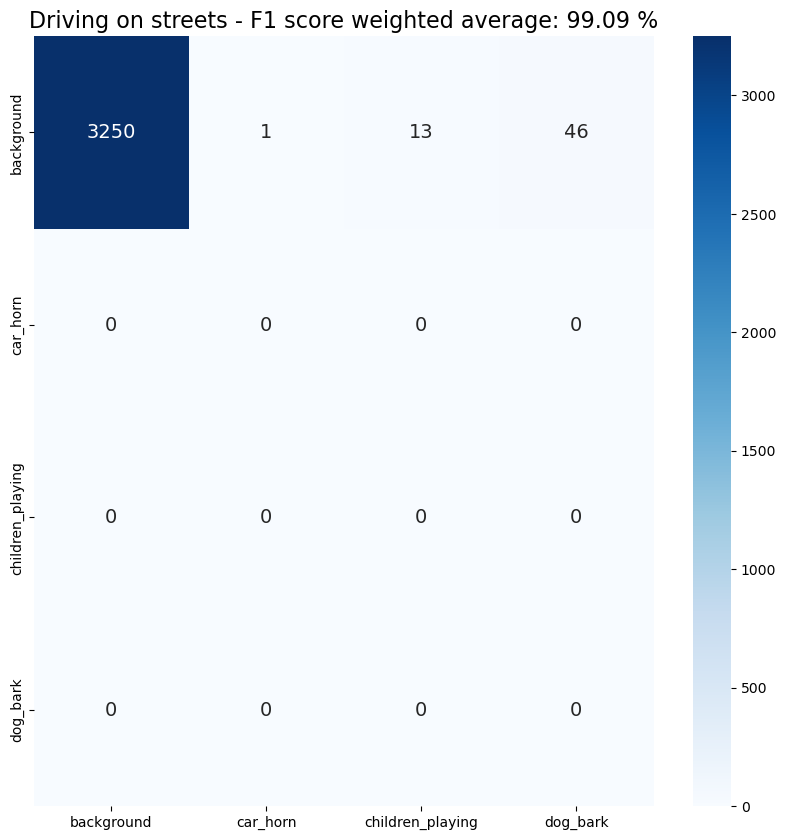

In [22]:
simple_conf_matrix(db_driving_gt, 
                   driving_pred, 
                   'Driving on streets',
                   nom_classes_driving,
                   driving_class_report_f1)

### Checking the predictions on notebook using the audios recorded during live prediction

In [23]:
def pred_audio(path_prediction: str):
    
    pred_signal = []
    pred_audio  = next(os.walk(path_prediction))[2]
    
    del pred_audio[-(len(pred_audio)-len(db_driving_gt)):]
    print(f'Number of audio samples...: {len(pred_audio)}')

    for audio in pred_audio:
        audio_temp,_ = librosa.load(os.path.join(path_prediction, audio), sr = 22050)
        pred_signal.append(audio_temp)
    
    return pred_signal

In [24]:
driving_audio = pred_audio(path_predictions_driving)

Number of audio samples...: 3310


In [25]:
driving_audio[0]

array([-0.01043189, -0.04162282, -0.03768477, ...,  0.0037429 ,
        0.01001589,  0.01254601], dtype=float32)

In [26]:
print(np.array(driving_audio).shape)

(3310, 24576)


In [27]:
# Checking the previous results for the CNN 2D model considering all audio samples.

ESR_EVAL              = ESR_evaluation_tflite(driving_audio[0:len(driving_audio)], 'CNN2D', path_modelsVal, path_arrays)
predictions_driving   = np.array(ESR_EVAL.predictions)
totalPredTime_driving = np.array(ESR_EVAL.totalPredTime)

Audio clip...........: 1
Prediction...........: background
Total predict time:..: 102.3528ms

Audio clip...........: 2
Prediction...........: background
Total predict time:..: 12.4790ms

Audio clip...........: 3
Prediction...........: background
Total predict time:..: 10.3732ms

Audio clip...........: 4
Prediction...........: background
Total predict time:..: 9.9704ms

Audio clip...........: 5
Prediction...........: background
Total predict time:..: 12.6062ms

Audio clip...........: 6
Prediction...........: background
Total predict time:..: 16.0553ms

Audio clip...........: 7
Prediction...........: background
Total predict time:..: 14.7198ms

Audio clip...........: 8
Prediction...........: background
Total predict time:..: 11.6316ms

Audio clip...........: 9
Prediction...........: background
Total predict time:..: 13.5750ms

Audio clip...........: 10
Prediction...........: background
Total predict time:..: 15.1730ms

Audio clip...........: 11
Prediction...........: background
Total pre

Prediction...........: background
Total predict time:..: 11.7422ms

Audio clip...........: 93
Prediction...........: background
Total predict time:..: 12.7198ms

Audio clip...........: 94
Prediction...........: background
Total predict time:..: 15.0634ms

Audio clip...........: 95
Prediction...........: background
Total predict time:..: 14.2529ms

Audio clip...........: 96
Prediction...........: background
Total predict time:..: 15.1192ms

Audio clip...........: 97
Prediction...........: background
Total predict time:..: 11.8254ms

Audio clip...........: 98
Prediction...........: background
Total predict time:..: 12.4975ms

Audio clip...........: 99
Prediction...........: background
Total predict time:..: 12.7751ms

Audio clip...........: 100
Prediction...........: background
Total predict time:..: 11.7737ms

Audio clip...........: 101
Prediction...........: background
Total predict time:..: 14.2263ms

Audio clip...........: 102
Prediction...........: background
Total predict time:..: 

Prediction...........: background
Total predict time:..: 10.5813ms

Audio clip...........: 198
Prediction...........: background
Total predict time:..: 14.9596ms

Audio clip...........: 199
Prediction...........: background
Total predict time:..: 12.0040ms

Audio clip...........: 200
Prediction...........: background
Total predict time:..: 10.3665ms

Audio clip...........: 201
Prediction...........: background
Total predict time:..: 10.3285ms

Audio clip...........: 202
Prediction...........: background
Total predict time:..: 10.2847ms

Audio clip...........: 203
Prediction...........: background
Total predict time:..: 9.8558ms

Audio clip...........: 204
Prediction...........: background
Total predict time:..: 9.5834ms

Audio clip...........: 205
Prediction...........: background
Total predict time:..: 10.9470ms

Audio clip...........: 206
Prediction...........: background
Total predict time:..: 13.2640ms

Audio clip...........: 207
Prediction...........: background
Total predict time

Prediction...........: background
Total predict time:..: 12.8453ms

Audio clip...........: 294
Prediction...........: background
Total predict time:..: 13.4933ms

Audio clip...........: 295
Prediction...........: background
Total predict time:..: 11.6393ms

Audio clip...........: 296
Prediction...........: background
Total predict time:..: 12.6026ms

Audio clip...........: 297
Prediction...........: background
Total predict time:..: 10.0697ms

Audio clip...........: 298
Prediction...........: background
Total predict time:..: 10.6330ms

Audio clip...........: 299
Prediction...........: background
Total predict time:..: 14.0711ms

Audio clip...........: 300
Prediction...........: background
Total predict time:..: 13.3942ms

Audio clip...........: 301
Prediction...........: background
Total predict time:..: 10.1006ms

Audio clip...........: 302
Prediction...........: background
Total predict time:..: 10.7186ms

Audio clip...........: 303
Prediction...........: background
Total predict ti

Audio clip...........: 384
Prediction...........: background
Total predict time:..: 13.7224ms

Audio clip...........: 385
Prediction...........: background
Total predict time:..: 12.7262ms

Audio clip...........: 386
Prediction...........: background
Total predict time:..: 10.9626ms

Audio clip...........: 387
Prediction...........: background
Total predict time:..: 10.2426ms

Audio clip...........: 388
Prediction...........: background
Total predict time:..: 12.3338ms

Audio clip...........: 389
Prediction...........: background
Total predict time:..: 15.2004ms

Audio clip...........: 390
Prediction...........: background
Total predict time:..: 14.5646ms

Audio clip...........: 391
Prediction...........: background
Total predict time:..: 15.2599ms

Audio clip...........: 392
Prediction...........: background
Total predict time:..: 12.3364ms

Audio clip...........: 393
Prediction...........: background
Total predict time:..: 13.0682ms

Audio clip...........: 394
Prediction...........: 

Prediction...........: background
Total predict time:..: 10.2742ms

Audio clip...........: 473
Prediction...........: background
Total predict time:..: 11.0610ms

Audio clip...........: 474
Prediction...........: background
Total predict time:..: 10.2094ms

Audio clip...........: 475
Prediction...........: background
Total predict time:..: 10.5543ms

Audio clip...........: 476
Prediction...........: background
Total predict time:..: 10.0766ms

Audio clip...........: 477
Prediction...........: background
Total predict time:..: 10.0121ms

Audio clip...........: 478
Prediction...........: background
Total predict time:..: 10.4501ms

Audio clip...........: 479
Prediction...........: background
Total predict time:..: 9.8498ms

Audio clip...........: 480
Prediction...........: background
Total predict time:..: 10.5955ms

Audio clip...........: 481
Prediction...........: background
Total predict time:..: 9.8480ms

Audio clip...........: 482
Prediction...........: background
Total predict time

Audio clip...........: 574
Prediction...........: background
Total predict time:..: 12.6019ms

Audio clip...........: 575
Prediction...........: background
Total predict time:..: 13.1072ms

Audio clip...........: 576
Prediction...........: background
Total predict time:..: 13.3561ms

Audio clip...........: 577
Prediction...........: background
Total predict time:..: 11.0218ms

Audio clip...........: 578
Prediction...........: background
Total predict time:..: 10.3678ms

Audio clip...........: 579
Prediction...........: background
Total predict time:..: 12.5672ms

Audio clip...........: 580
Prediction...........: background
Total predict time:..: 12.4349ms

Audio clip...........: 581
Prediction...........: background
Total predict time:..: 12.2772ms

Audio clip...........: 582
Prediction...........: background
Total predict time:..: 11.9655ms

Audio clip...........: 583
Prediction...........: background
Total predict time:..: 16.6112ms

Audio clip...........: 584
Prediction...........: 

Audio clip...........: 673
Prediction...........: background
Total predict time:..: 11.0589ms

Audio clip...........: 674
Prediction...........: background
Total predict time:..: 22.9040ms

Audio clip...........: 675
Prediction...........: background
Total predict time:..: 13.3811ms

Audio clip...........: 676
Prediction...........: background
Total predict time:..: 9.9262ms

Audio clip...........: 677
Prediction...........: background
Total predict time:..: 10.9537ms

Audio clip...........: 678
Prediction...........: background
Total predict time:..: 9.7459ms

Audio clip...........: 679
Prediction...........: background
Total predict time:..: 12.1873ms

Audio clip...........: 680
Prediction...........: background
Total predict time:..: 14.3281ms

Audio clip...........: 681
Prediction...........: background
Total predict time:..: 14.6872ms

Audio clip...........: 682
Prediction...........: background
Total predict time:..: 12.3725ms

Audio clip...........: 683
Prediction...........: ba

Prediction...........: background
Total predict time:..: 13.8418ms

Audio clip...........: 764
Prediction...........: background
Total predict time:..: 15.5747ms

Audio clip...........: 765
Prediction...........: background
Total predict time:..: 10.3512ms

Audio clip...........: 766
Prediction...........: background
Total predict time:..: 10.4374ms

Audio clip...........: 767
Prediction...........: background
Total predict time:..: 9.4933ms

Audio clip...........: 768
Prediction...........: background
Total predict time:..: 13.5391ms

Audio clip...........: 769
Prediction...........: background
Total predict time:..: 13.5309ms

Audio clip...........: 770
Prediction...........: background
Total predict time:..: 11.5090ms

Audio clip...........: 771
Prediction...........: background
Total predict time:..: 9.2484ms

Audio clip...........: 772
Prediction...........: background
Total predict time:..: 13.5020ms

Audio clip...........: 773
Prediction...........: background
Total predict time

Audio clip...........: 851
Prediction...........: background
Total predict time:..: 12.6955ms

Audio clip...........: 852
Prediction...........: background
Total predict time:..: 10.7967ms

Audio clip...........: 853
Prediction...........: background
Total predict time:..: 12.5565ms

Audio clip...........: 854
Prediction...........: background
Total predict time:..: 11.8756ms

Audio clip...........: 855
Prediction...........: background
Total predict time:..: 14.4572ms

Audio clip...........: 856
Prediction...........: background
Total predict time:..: 13.1550ms

Audio clip...........: 857
Prediction...........: background
Total predict time:..: 9.9897ms

Audio clip...........: 858
Prediction...........: background
Total predict time:..: 9.3261ms

Audio clip...........: 859
Prediction...........: background
Total predict time:..: 9.5897ms

Audio clip...........: 860
Prediction...........: background
Total predict time:..: 12.5172ms

Audio clip...........: 861
Prediction...........: bac

Prediction...........: background
Total predict time:..: 12.6430ms

Audio clip...........: 941
Prediction...........: background
Total predict time:..: 13.6014ms

Audio clip...........: 942
Prediction...........: dog_bark
Total predict time:..: 10.8936ms

Audio clip...........: 943
Prediction...........: dog_bark
Total predict time:..: 10.4973ms

Audio clip...........: 944
Prediction...........: dog_bark
Total predict time:..: 10.2738ms

Audio clip...........: 945
Prediction...........: background
Total predict time:..: 10.1180ms

Audio clip...........: 946
Prediction...........: background
Total predict time:..: 9.7927ms

Audio clip...........: 947
Prediction...........: children_playing
Total predict time:..: 9.8520ms

Audio clip...........: 948
Prediction...........: dog_bark
Total predict time:..: 9.2714ms

Audio clip...........: 949
Prediction...........: children_playing
Total predict time:..: 9.9171ms

Audio clip...........: 950
Prediction...........: background
Total predict ti

Prediction...........: background
Total predict time:..: 12.2296ms

Audio clip...........: 1036
Prediction...........: background
Total predict time:..: 10.4421ms

Audio clip...........: 1037
Prediction...........: background
Total predict time:..: 10.7817ms

Audio clip...........: 1038
Prediction...........: background
Total predict time:..: 12.8457ms

Audio clip...........: 1039
Prediction...........: background
Total predict time:..: 12.7250ms

Audio clip...........: 1040
Prediction...........: background
Total predict time:..: 12.0839ms

Audio clip...........: 1041
Prediction...........: background
Total predict time:..: 9.4187ms

Audio clip...........: 1042
Prediction...........: background
Total predict time:..: 9.7336ms

Audio clip...........: 1043
Prediction...........: background
Total predict time:..: 10.0122ms

Audio clip...........: 1044
Prediction...........: background
Total predict time:..: 9.6006ms

Audio clip...........: 1045
Prediction...........: background
Total pre

Prediction...........: background
Total predict time:..: 11.0576ms

Audio clip...........: 1129
Prediction...........: background
Total predict time:..: 11.4519ms

Audio clip...........: 1130
Prediction...........: background
Total predict time:..: 13.9983ms

Audio clip...........: 1131
Prediction...........: background
Total predict time:..: 13.7033ms

Audio clip...........: 1132
Prediction...........: background
Total predict time:..: 13.9583ms

Audio clip...........: 1133
Prediction...........: background
Total predict time:..: 11.0718ms

Audio clip...........: 1134
Prediction...........: background
Total predict time:..: 9.8994ms

Audio clip...........: 1135
Prediction...........: background
Total predict time:..: 11.6562ms

Audio clip...........: 1136
Prediction...........: background
Total predict time:..: 12.6131ms

Audio clip...........: 1137
Prediction...........: background
Total predict time:..: 11.3377ms

Audio clip...........: 1138
Prediction...........: background
Total p

Audio clip...........: 1221
Prediction...........: background
Total predict time:..: 12.8113ms

Audio clip...........: 1222
Prediction...........: background
Total predict time:..: 10.5213ms

Audio clip...........: 1223
Prediction...........: background
Total predict time:..: 9.8539ms

Audio clip...........: 1224
Prediction...........: background
Total predict time:..: 12.9590ms

Audio clip...........: 1225
Prediction...........: background
Total predict time:..: 13.2417ms

Audio clip...........: 1226
Prediction...........: background
Total predict time:..: 14.9882ms

Audio clip...........: 1227
Prediction...........: background
Total predict time:..: 12.3005ms

Audio clip...........: 1228
Prediction...........: background
Total predict time:..: 10.0179ms

Audio clip...........: 1229
Prediction...........: background
Total predict time:..: 10.0907ms

Audio clip...........: 1230
Prediction...........: background
Total predict time:..: 11.4960ms

Audio clip...........: 1231
Prediction...

Audio clip...........: 1312
Prediction...........: background
Total predict time:..: 13.3107ms

Audio clip...........: 1313
Prediction...........: background
Total predict time:..: 13.4492ms

Audio clip...........: 1314
Prediction...........: background
Total predict time:..: 13.7201ms

Audio clip...........: 1315
Prediction...........: background
Total predict time:..: 10.9768ms

Audio clip...........: 1316
Prediction...........: background
Total predict time:..: 10.8926ms

Audio clip...........: 1317
Prediction...........: background
Total predict time:..: 10.8552ms

Audio clip...........: 1318
Prediction...........: background
Total predict time:..: 10.5811ms

Audio clip...........: 1319
Prediction...........: background
Total predict time:..: 10.3421ms

Audio clip...........: 1320
Prediction...........: background
Total predict time:..: 12.2803ms

Audio clip...........: 1321
Prediction...........: background
Total predict time:..: 14.7222ms

Audio clip...........: 1322
Prediction..

Audio clip...........: 1407
Prediction...........: background
Total predict time:..: 12.8472ms

Audio clip...........: 1408
Prediction...........: background
Total predict time:..: 12.3898ms

Audio clip...........: 1409
Prediction...........: background
Total predict time:..: 12.9204ms

Audio clip...........: 1410
Prediction...........: background
Total predict time:..: 13.1295ms

Audio clip...........: 1411
Prediction...........: background
Total predict time:..: 12.4844ms

Audio clip...........: 1412
Prediction...........: background
Total predict time:..: 12.1074ms

Audio clip...........: 1413
Prediction...........: background
Total predict time:..: 12.3309ms

Audio clip...........: 1414
Prediction...........: background
Total predict time:..: 12.0990ms

Audio clip...........: 1415
Prediction...........: background
Total predict time:..: 9.8175ms

Audio clip...........: 1416
Prediction...........: background
Total predict time:..: 9.9922ms

Audio clip...........: 1417
Prediction....

Prediction...........: background
Total predict time:..: 17.8829ms

Audio clip...........: 1494
Prediction...........: background
Total predict time:..: 18.6451ms

Audio clip...........: 1495
Prediction...........: background
Total predict time:..: 18.0146ms

Audio clip...........: 1496
Prediction...........: background
Total predict time:..: 13.1990ms

Audio clip...........: 1497
Prediction...........: background
Total predict time:..: 11.6624ms

Audio clip...........: 1498
Prediction...........: background
Total predict time:..: 11.5667ms

Audio clip...........: 1499
Prediction...........: background
Total predict time:..: 14.1610ms

Audio clip...........: 1500
Prediction...........: background
Total predict time:..: 12.7045ms

Audio clip...........: 1501
Prediction...........: background
Total predict time:..: 10.2069ms

Audio clip...........: 1502
Prediction...........: background
Total predict time:..: 10.0949ms

Audio clip...........: 1503
Prediction...........: background
Total 

Prediction...........: background
Total predict time:..: 12.6455ms

Audio clip...........: 1596
Prediction...........: background
Total predict time:..: 11.3898ms

Audio clip...........: 1597
Prediction...........: background
Total predict time:..: 14.0336ms

Audio clip...........: 1598
Prediction...........: background
Total predict time:..: 14.4042ms

Audio clip...........: 1599
Prediction...........: background
Total predict time:..: 10.3214ms

Audio clip...........: 1600
Prediction...........: background
Total predict time:..: 13.4687ms

Audio clip...........: 1601
Prediction...........: background
Total predict time:..: 10.1484ms

Audio clip...........: 1602
Prediction...........: background
Total predict time:..: 12.8860ms

Audio clip...........: 1603
Prediction...........: background
Total predict time:..: 10.7698ms

Audio clip...........: 1604
Prediction...........: background
Total predict time:..: 11.5074ms

Audio clip...........: 1605
Prediction...........: background
Total 

Audio clip...........: 1684
Prediction...........: background
Total predict time:..: 10.9976ms

Audio clip...........: 1685
Prediction...........: background
Total predict time:..: 11.5031ms

Audio clip...........: 1686
Prediction...........: background
Total predict time:..: 11.8335ms

Audio clip...........: 1687
Prediction...........: background
Total predict time:..: 10.1485ms

Audio clip...........: 1688
Prediction...........: background
Total predict time:..: 12.8278ms

Audio clip...........: 1689
Prediction...........: background
Total predict time:..: 11.9227ms

Audio clip...........: 1690
Prediction...........: background
Total predict time:..: 13.2520ms

Audio clip...........: 1691
Prediction...........: background
Total predict time:..: 15.2455ms

Audio clip...........: 1692
Prediction...........: background
Total predict time:..: 14.9995ms

Audio clip...........: 1693
Prediction...........: background
Total predict time:..: 13.1215ms

Audio clip...........: 1694
Prediction..

Audio clip...........: 1774
Prediction...........: background
Total predict time:..: 15.2257ms

Audio clip...........: 1775
Prediction...........: background
Total predict time:..: 13.8778ms

Audio clip...........: 1776
Prediction...........: background
Total predict time:..: 12.5066ms

Audio clip...........: 1777
Prediction...........: background
Total predict time:..: 12.1693ms

Audio clip...........: 1778
Prediction...........: background
Total predict time:..: 10.0287ms

Audio clip...........: 1779
Prediction...........: background
Total predict time:..: 10.4423ms

Audio clip...........: 1780
Prediction...........: background
Total predict time:..: 10.0731ms

Audio clip...........: 1781
Prediction...........: background
Total predict time:..: 12.2215ms

Audio clip...........: 1782
Prediction...........: background
Total predict time:..: 13.8346ms

Audio clip...........: 1783
Prediction...........: background
Total predict time:..: 11.0207ms

Audio clip...........: 1784
Prediction..

Audio clip...........: 1874
Prediction...........: background
Total predict time:..: 14.6941ms

Audio clip...........: 1875
Prediction...........: background
Total predict time:..: 11.5637ms

Audio clip...........: 1876
Prediction...........: background
Total predict time:..: 11.7054ms

Audio clip...........: 1877
Prediction...........: background
Total predict time:..: 13.5035ms

Audio clip...........: 1878
Prediction...........: background
Total predict time:..: 12.3727ms

Audio clip...........: 1879
Prediction...........: background
Total predict time:..: 13.3119ms

Audio clip...........: 1880
Prediction...........: background
Total predict time:..: 14.2002ms

Audio clip...........: 1881
Prediction...........: background
Total predict time:..: 10.5979ms

Audio clip...........: 1882
Prediction...........: background
Total predict time:..: 11.5607ms

Audio clip...........: 1883
Prediction...........: background
Total predict time:..: 12.2420ms

Audio clip...........: 1884
Prediction..

Audio clip...........: 1968
Prediction...........: background
Total predict time:..: 12.8658ms

Audio clip...........: 1969
Prediction...........: dog_bark
Total predict time:..: 11.3256ms

Audio clip...........: 1970
Prediction...........: background
Total predict time:..: 11.3201ms

Audio clip...........: 1971
Prediction...........: background
Total predict time:..: 10.7315ms

Audio clip...........: 1972
Prediction...........: background
Total predict time:..: 16.4967ms

Audio clip...........: 1973
Prediction...........: background
Total predict time:..: 12.9682ms

Audio clip...........: 1974
Prediction...........: background
Total predict time:..: 11.3479ms

Audio clip...........: 1975
Prediction...........: dog_bark
Total predict time:..: 10.6350ms

Audio clip...........: 1976
Prediction...........: background
Total predict time:..: 10.8946ms

Audio clip...........: 1977
Prediction...........: background
Total predict time:..: 15.5448ms

Audio clip...........: 1978
Prediction......

Audio clip...........: 2054
Prediction...........: background
Total predict time:..: 14.0444ms

Audio clip...........: 2055
Prediction...........: background
Total predict time:..: 14.9377ms

Audio clip...........: 2056
Prediction...........: background
Total predict time:..: 13.2451ms

Audio clip...........: 2057
Prediction...........: background
Total predict time:..: 16.5555ms

Audio clip...........: 2058
Prediction...........: background
Total predict time:..: 14.2459ms

Audio clip...........: 2059
Prediction...........: background
Total predict time:..: 13.1851ms

Audio clip...........: 2060
Prediction...........: background
Total predict time:..: 10.2839ms

Audio clip...........: 2061
Prediction...........: background
Total predict time:..: 11.6665ms

Audio clip...........: 2062
Prediction...........: background
Total predict time:..: 13.3490ms

Audio clip...........: 2063
Prediction...........: background
Total predict time:..: 13.2801ms

Audio clip...........: 2064
Prediction..

Prediction...........: background
Total predict time:..: 14.6990ms

Audio clip...........: 2153
Prediction...........: children_playing
Total predict time:..: 11.1312ms

Audio clip...........: 2154
Prediction...........: background
Total predict time:..: 10.7341ms

Audio clip...........: 2155
Prediction...........: background
Total predict time:..: 12.8730ms

Audio clip...........: 2156
Prediction...........: background
Total predict time:..: 10.7052ms

Audio clip...........: 2157
Prediction...........: background
Total predict time:..: 10.1415ms

Audio clip...........: 2158
Prediction...........: background
Total predict time:..: 10.4595ms

Audio clip...........: 2159
Prediction...........: background
Total predict time:..: 9.8676ms

Audio clip...........: 2160
Prediction...........: background
Total predict time:..: 10.0580ms

Audio clip...........: 2161
Prediction...........: background
Total predict time:..: 12.2612ms

Audio clip...........: 2162
Prediction...........: background
T

Audio clip...........: 2244
Prediction...........: background
Total predict time:..: 12.7220ms

Audio clip...........: 2245
Prediction...........: background
Total predict time:..: 13.3284ms

Audio clip...........: 2246
Prediction...........: background
Total predict time:..: 14.2653ms

Audio clip...........: 2247
Prediction...........: background
Total predict time:..: 14.9872ms

Audio clip...........: 2248
Prediction...........: background
Total predict time:..: 12.1553ms

Audio clip...........: 2249
Prediction...........: background
Total predict time:..: 14.1712ms

Audio clip...........: 2250
Prediction...........: background
Total predict time:..: 13.1698ms

Audio clip...........: 2251
Prediction...........: background
Total predict time:..: 10.2269ms

Audio clip...........: 2252
Prediction...........: background
Total predict time:..: 12.9440ms

Audio clip...........: 2253
Prediction...........: background
Total predict time:..: 12.8715ms

Audio clip...........: 2254
Prediction..

Prediction...........: background
Total predict time:..: 13.5037ms

Audio clip...........: 2344
Prediction...........: background
Total predict time:..: 15.7923ms

Audio clip...........: 2345
Prediction...........: background
Total predict time:..: 14.6674ms

Audio clip...........: 2346
Prediction...........: background
Total predict time:..: 14.4916ms

Audio clip...........: 2347
Prediction...........: background
Total predict time:..: 13.5490ms

Audio clip...........: 2348
Prediction...........: background
Total predict time:..: 13.1183ms

Audio clip...........: 2349
Prediction...........: background
Total predict time:..: 16.1360ms

Audio clip...........: 2350
Prediction...........: background
Total predict time:..: 15.7218ms

Audio clip...........: 2351
Prediction...........: background
Total predict time:..: 14.8938ms

Audio clip...........: 2352
Prediction...........: background
Total predict time:..: 14.3361ms

Audio clip...........: 2353
Prediction...........: background
Total 

Prediction...........: background
Total predict time:..: 12.6680ms

Audio clip...........: 2434
Prediction...........: background
Total predict time:..: 13.5278ms

Audio clip...........: 2435
Prediction...........: background
Total predict time:..: 14.2525ms

Audio clip...........: 2436
Prediction...........: background
Total predict time:..: 14.3624ms

Audio clip...........: 2437
Prediction...........: background
Total predict time:..: 11.7689ms

Audio clip...........: 2438
Prediction...........: background
Total predict time:..: 11.5343ms

Audio clip...........: 2439
Prediction...........: background
Total predict time:..: 9.5207ms

Audio clip...........: 2440
Prediction...........: background
Total predict time:..: 13.6357ms

Audio clip...........: 2441
Prediction...........: background
Total predict time:..: 12.1767ms

Audio clip...........: 2442
Prediction...........: background
Total predict time:..: 9.8188ms

Audio clip...........: 2443
Prediction...........: background
Total pr

Prediction...........: background
Total predict time:..: 10.3900ms

Audio clip...........: 2522
Prediction...........: background
Total predict time:..: 11.2468ms

Audio clip...........: 2523
Prediction...........: background
Total predict time:..: 9.6942ms

Audio clip...........: 2524
Prediction...........: background
Total predict time:..: 13.3266ms

Audio clip...........: 2525
Prediction...........: background
Total predict time:..: 13.3296ms

Audio clip...........: 2526
Prediction...........: background
Total predict time:..: 9.9284ms

Audio clip...........: 2527
Prediction...........: background
Total predict time:..: 13.2526ms

Audio clip...........: 2528
Prediction...........: background
Total predict time:..: 12.1595ms

Audio clip...........: 2529
Prediction...........: background
Total predict time:..: 15.6786ms

Audio clip...........: 2530
Prediction...........: background
Total predict time:..: 15.8642ms

Audio clip...........: 2531
Prediction...........: background
Total pr

Prediction...........: background
Total predict time:..: 12.1389ms

Audio clip...........: 2608
Prediction...........: background
Total predict time:..: 10.2732ms

Audio clip...........: 2609
Prediction...........: background
Total predict time:..: 12.7700ms

Audio clip...........: 2610
Prediction...........: background
Total predict time:..: 10.9517ms

Audio clip...........: 2611
Prediction...........: background
Total predict time:..: 9.4907ms

Audio clip...........: 2612
Prediction...........: background
Total predict time:..: 12.8974ms

Audio clip...........: 2613
Prediction...........: background
Total predict time:..: 13.3108ms

Audio clip...........: 2614
Prediction...........: background
Total predict time:..: 10.9365ms

Audio clip...........: 2615
Prediction...........: background
Total predict time:..: 9.5730ms

Audio clip...........: 2616
Prediction...........: background
Total predict time:..: 15.5763ms

Audio clip...........: 2617
Prediction...........: background
Total pr

Audio clip...........: 2693
Prediction...........: background
Total predict time:..: 14.2002ms

Audio clip...........: 2694
Prediction...........: background
Total predict time:..: 17.7003ms

Audio clip...........: 2695
Prediction...........: background
Total predict time:..: 13.4106ms

Audio clip...........: 2696
Prediction...........: background
Total predict time:..: 11.5788ms

Audio clip...........: 2697
Prediction...........: background
Total predict time:..: 14.7197ms

Audio clip...........: 2698
Prediction...........: background
Total predict time:..: 15.3891ms

Audio clip...........: 2699
Prediction...........: background
Total predict time:..: 13.4593ms

Audio clip...........: 2700
Prediction...........: background
Total predict time:..: 11.2433ms

Audio clip...........: 2701
Prediction...........: background
Total predict time:..: 14.3765ms

Audio clip...........: 2702
Prediction...........: background
Total predict time:..: 13.6814ms

Audio clip...........: 2703
Prediction..

Prediction...........: background
Total predict time:..: 15.9556ms

Audio clip...........: 2793
Prediction...........: background
Total predict time:..: 10.8799ms

Audio clip...........: 2794
Prediction...........: background
Total predict time:..: 10.5577ms

Audio clip...........: 2795
Prediction...........: background
Total predict time:..: 12.3537ms

Audio clip...........: 2796
Prediction...........: background
Total predict time:..: 9.6379ms

Audio clip...........: 2797
Prediction...........: background
Total predict time:..: 10.4668ms

Audio clip...........: 2798
Prediction...........: background
Total predict time:..: 10.0501ms

Audio clip...........: 2799
Prediction...........: dog_bark
Total predict time:..: 10.0626ms

Audio clip...........: 2800
Prediction...........: background
Total predict time:..: 10.4384ms

Audio clip...........: 2801
Prediction...........: background
Total predict time:..: 10.6268ms

Audio clip...........: 2802
Prediction...........: background
Total pre

Prediction...........: background
Total predict time:..: 16.7146ms

Audio clip...........: 2894
Prediction...........: background
Total predict time:..: 11.4799ms

Audio clip...........: 2895
Prediction...........: background
Total predict time:..: 11.6815ms

Audio clip...........: 2896
Prediction...........: background
Total predict time:..: 12.8223ms

Audio clip...........: 2897
Prediction...........: background
Total predict time:..: 13.4506ms

Audio clip...........: 2898
Prediction...........: background
Total predict time:..: 9.8408ms

Audio clip...........: 2899
Prediction...........: background
Total predict time:..: 9.5525ms

Audio clip...........: 2900
Prediction...........: background
Total predict time:..: 9.8705ms

Audio clip...........: 2901
Prediction...........: background
Total predict time:..: 9.4060ms

Audio clip...........: 2902
Prediction...........: background
Total predict time:..: 10.0144ms

Audio clip...........: 2903
Prediction...........: background
Total pred

Audio clip...........: 2981
Prediction...........: background
Total predict time:..: 11.4285ms

Audio clip...........: 2982
Prediction...........: background
Total predict time:..: 10.7935ms

Audio clip...........: 2983
Prediction...........: background
Total predict time:..: 10.8372ms

Audio clip...........: 2984
Prediction...........: background
Total predict time:..: 10.2300ms

Audio clip...........: 2985
Prediction...........: background
Total predict time:..: 9.7947ms

Audio clip...........: 2986
Prediction...........: background
Total predict time:..: 9.5155ms

Audio clip...........: 2987
Prediction...........: background
Total predict time:..: 12.1815ms

Audio clip...........: 2988
Prediction...........: background
Total predict time:..: 11.5640ms

Audio clip...........: 2989
Prediction...........: background
Total predict time:..: 9.8456ms

Audio clip...........: 2990
Prediction...........: background
Total predict time:..: 12.2610ms

Audio clip...........: 2991
Prediction.....

Prediction...........: background
Total predict time:..: 12.3390ms

Audio clip...........: 3073
Prediction...........: background
Total predict time:..: 11.5955ms

Audio clip...........: 3074
Prediction...........: background
Total predict time:..: 11.6184ms

Audio clip...........: 3075
Prediction...........: background
Total predict time:..: 9.6623ms

Audio clip...........: 3076
Prediction...........: background
Total predict time:..: 10.1128ms

Audio clip...........: 3077
Prediction...........: background
Total predict time:..: 10.0213ms

Audio clip...........: 3078
Prediction...........: background
Total predict time:..: 10.0299ms

Audio clip...........: 3079
Prediction...........: background
Total predict time:..: 9.8232ms

Audio clip...........: 3080
Prediction...........: background
Total predict time:..: 13.2520ms

Audio clip...........: 3081
Prediction...........: background
Total predict time:..: 13.2216ms

Audio clip...........: 3082
Prediction...........: dog_bark
Total pred

Audio clip...........: 3158
Prediction...........: background
Total predict time:..: 12.3314ms

Audio clip...........: 3159
Prediction...........: background
Total predict time:..: 11.9272ms

Audio clip...........: 3160
Prediction...........: background
Total predict time:..: 13.0483ms

Audio clip...........: 3161
Prediction...........: background
Total predict time:..: 13.6778ms

Audio clip...........: 3162
Prediction...........: background
Total predict time:..: 10.2758ms

Audio clip...........: 3163
Prediction...........: background
Total predict time:..: 13.3907ms

Audio clip...........: 3164
Prediction...........: background
Total predict time:..: 14.6359ms

Audio clip...........: 3165
Prediction...........: background
Total predict time:..: 12.4696ms

Audio clip...........: 3166
Prediction...........: background
Total predict time:..: 9.5907ms

Audio clip...........: 3167
Prediction...........: background
Total predict time:..: 12.9528ms

Audio clip...........: 3168
Prediction...

Prediction...........: background
Total predict time:..: 17.0181ms

Audio clip...........: 3258
Prediction...........: background
Total predict time:..: 15.8840ms

Audio clip...........: 3259
Prediction...........: background
Total predict time:..: 13.4320ms

Audio clip...........: 3260
Prediction...........: background
Total predict time:..: 13.0939ms

Audio clip...........: 3261
Prediction...........: background
Total predict time:..: 15.0937ms

Audio clip...........: 3262
Prediction...........: background
Total predict time:..: 12.1251ms

Audio clip...........: 3263
Prediction...........: background
Total predict time:..: 14.4425ms

Audio clip...........: 3264
Prediction...........: background
Total predict time:..: 18.8821ms

Audio clip...........: 3265
Prediction...........: background
Total predict time:..: 18.2577ms

Audio clip...........: 3266
Prediction...........: background
Total predict time:..: 14.4846ms

Audio clip...........: 3267
Prediction...........: background
Total 

In [28]:
predictions_driving

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [30]:
predictions_driving_cat = np.array(nom_classes)[predictions_driving]
predictions_driving_cat

array(['background', 'background', 'background', ..., 'background',
       'background', 'background'], dtype='<U16')

In [31]:
np.array_equal(driving_pred, predictions_driving_cat)

True

***

# End of the notebook